# 导入需要的package

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import json
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


# 读取所有train validate数据，并添加一列常数项

In [2]:
# 收集所有的数据文件名
import os
import warnings
warnings.filterwarnings("ignore")
def get_file_names(folder_path):
    file_names = []
    for root, dirs, files in os.walk(folder_path):
        for tfile in files:
            file_names.append(tfile)
    return file_names

train_folder_path = r"" #替换为您要查找的训练集文件夹路径
train_file_names = get_file_names(train_folder_path)#收集train集文件名

test_folder_path = r"" #替换为您要查找的测试集文件夹路径
test_file_names = get_file_names(test_folder_path)#收集test集文件名

print(train_file_names)
print(test_file_names)

file_name=train_file_names+test_file_names

#初始化
x_data=pd.DataFrame()
y_data=pd.DataFrame()
t_data=pd.DataFrame()

x_train=pd.DataFrame()
y_train=pd.DataFrame()
t_train=pd.DataFrame()

x_test=pd.DataFrame()
y_test=pd.DataFrame()
t_test=pd.DataFrame()

leng=[]#各天数据量

#读取训练集
from xy_parser import parse_xy_file
## xy data
for file in train_file_names:
    cur_dir = Path(r"").parent.absolute()#替换为您要查找的文件夹路径
    xy_file = cur_dir / 'xy_train'/ file
    xy_info, xy_df = parse_xy_file(xy_file)
    # xy_info is irrelavent to the interview
    # xy_df is a dataframe having all data required
    leng.append(xy_df.shape[0])

    xy_cols = xy_df.columns
    t_col = xy_cols[0]
    y_col = xy_cols[-1]


    xy_df.rename(columns = {y_col: 'Y'}, inplace = True) # for simplicity, rename the long Y name to short
    xy_df.rename(columns = {t_col: 'T'}, inplace = True)
    x_cols = [x for x in xy_cols if x not in [t_col, y_col]] # the x_cols should be match with "InputNames" baseline_model.json

    ## baseline_model
    #print(x_cols==xy_cols)
    model_info = json.load(open(cur_dir / 'baseline_model.json', 'r'))
    for x in x_cols:
        assert(x in model_info['InputNames']), f'Error! unknow {x}!'

    x_data = pd.concat([x_data,xy_df[x_cols] ], axis=0) #add current data to x_data
    y_data = pd.concat([y_data,xy_df['Y'] ], axis=0)
    t_data = pd.concat([t_data,xy_df['T'] ], axis=0)
    
    x_train = pd.concat([x_train,xy_df[x_cols] ], axis=0)#add current data to x_train
    y_train = pd.concat([y_train,xy_df['Y'] ], axis=0)
    t_train = pd.concat([t_train,xy_df['T'] ], axis=0)
    #print(x_train.shape[0])

#读取测试集
for file in test_file_names:
    cur_dir = Path(r"").parent.absolute()#替换为您要查找的文件夹路径
    xy_file = cur_dir / 'xy_validate'/ file
    xy_info, xy_df = parse_xy_file(xy_file)
    # xy_info is irrelavent to the interview
    # xy_df is a dataframe having all data required
    leng.append(xy_df.shape[0])

    xy_cols = xy_df.columns
    t_col = xy_cols[0]
    y_col = xy_cols[-1]


    xy_df.rename(columns = {y_col: 'Y'}, inplace = True) # for simplicity, rename the long Y name to short
    xy_df.rename(columns = {t_col: 'T'}, inplace = True)
    x_cols = [x for x in xy_cols if x not in [t_col, y_col]] # the x_cols should be match with "InputNames" baseline_model.json

    ## baseline_model
    #print(x_cols==xy_cols)
    model_info = json.load(open(cur_dir / 'baseline_model.json', 'r'))
    for x in x_cols:
        assert(x in model_info['InputNames']), f'Error! unknow {x}!'

    x_data = pd.concat([x_data,xy_df[x_cols] ], axis=0)
    y_data = pd.concat([y_data,xy_df['Y'] ], axis=0)
    t_data = pd.concat([t_data,xy_df['T'] ], axis=0)

    x_test = pd.concat([x_test,xy_df[x_cols] ], axis=0)
    y_test = pd.concat([y_test,xy_df['Y'] ], axis=0)
    t_test = pd.concat([t_test,xy_df['T'] ], axis=0)    
    #print(x_train.shape[0])

locat=[0]#记录每日数据集长度
cur=0
for i in leng:
    cur+=i
    locat.append(cur)

#插入常数项
x_data.insert(0, 'X0', 1)
x_train.insert(0, 'X0', 1)
x_test.insert(0, 'X0', 1)

#修改列名为Xi
x_cols=x_data.columns
for i in range(x_cols.shape[0]):
    x_data.rename(columns = {x_cols[i]: f'X{i}'}, inplace = True)
    x_train.rename(columns = {x_cols[i]: f'X{i}'}, inplace = True)
    x_test.rename(columns = {x_cols[i]: f'X{i}'}, inplace = True)




['20220425.xy', '20220426.xy', '20220427.xy', '20220428.xy', '20220429.xy', '20220505.xy', '20220506.xy', '20220509.xy', '20220510.xy', '20220511.xy', '20220512.xy', '20220513.xy', '20220516.xy', '20220517.xy', '20220518.xy', '20220519.xy', '20220520.xy', '20220523.xy', '20220524.xy', '20220525.xy', '20220526.xy', '20220527.xy', '20220530.xy', '20220531.xy', '20220601.xy', '20220602.xy', '20220606.xy', '20220607.xy', '20220608.xy', '20220609.xy', '20220610.xy', '20220613.xy', '20220614.xy', '20220615.xy', '20220616.xy', '20220617.xy', '20220620.xy', '20220621.xy', '20220622.xy', '20220623.xy', '20220624.xy', '20220627.xy', '20220628.xy', '20220629.xy', '20220630.xy']
['20220701.xy', '20220704.xy', '20220705.xy', '20220706.xy', '20220707.xy', '20220708.xy']


# 查看有无缺失值

In [3]:
nullnum=[]
for i in range(x_data.shape[1]):
    nullnum.append(x_data.iloc[:,i].isna().sum())
    
print("number of nan in factors' data: ",sum(nullnum))

number of nan in factors' data:  0


# 测试baseline模型

Basline r2_score in train data:  0.05428279496738808
Baseline R2 score in 1-th test day: -0.10336158941572915
Baseline R2 score in 2-th test day: -0.08200345579407653
Baseline R2 score in 3-th test day: -0.125829130230507
Baseline R2 score in 4-th test day: -0.05748741391067691
Baseline R2 score in 5-th test day: -0.08761307721419631
Baseline R2 score in 6-th test day: -0.07984885510169693


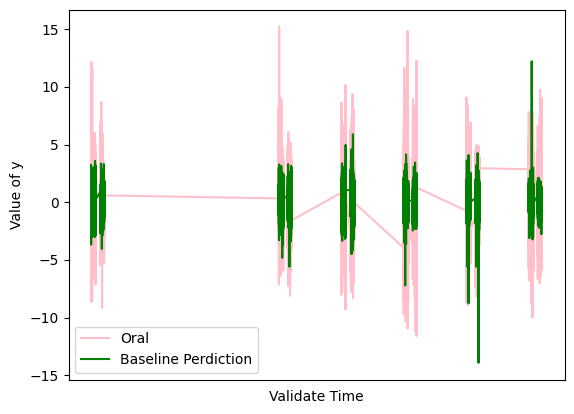

In [4]:
model_info = json.load(open(r"D:\cschw\机器学习\quant1_pkg\baseline_model.json", 'r'))
baseline_coe=[model_info['Constant']]
for i in model_info['Coefficients']:
    baseline_coe.append(i)
baseline_coe=np.array(baseline_coe)

y_baseline=np.dot(np.array(x_train),baseline_coe)
print("Basline r2_score in train data: ",r2_score(y_true=y_train,y_pred=y_baseline))

baseline_score=[r2_score(y_true=y_train,y_pred=y_baseline)]
plt.plot(t_test,y_test,color='pink')
baseline_var=[]

for i in range(len(test_file_names)):#分别查看第i个测试集中模型的r2score
    st=locat[i+len(train_file_names)]-locat[len(train_file_names)]
    en=locat[i+len(train_file_names)+1]-locat[len(train_file_names)]


    y_baseline=np.dot(np.array(x_train.iloc[st:en,:]),baseline_coe)
    sco=r2_score(y_true=y_test.iloc[st:en,:],y_pred=y_baseline)

    plt.plot(t_test.iloc[st:en,:],y_baseline,color='green',label='Basline Perdiction')

    print(f"Baseline R2 score in {i+1}-th test day:",sco)
    baseline_score.append(sco)
    baseline_var.append(np.var(y_baseline))

plt.xlabel('Validate Time')
plt.xticks ([])
plt.ylabel("Value of y")
plt.legend(labels=['Oral','Baseline Perdiction'])
plt.show()

    

# 运用PCA进行降维

In [5]:
def pca_change(data,train,test,acc):
    pca = PCA(n_components=None)
    data=data.iloc[:,:]

    pca.fit(data)

    print("accmulated explained ratio: ",np.cumsum(pca.explained_variance_ratio_))
    repeat_col=len(np.where(np.cumsum(pca.explained_variance_ratio_)>=acc)[0])
    print(f"运用 PCA, 如果我们将 accmulated explained ratio 设置为 {acc}，应删除 {repeat_col} 个因子")

    pca = PCA(n_components=len(data.columns)-repeat_col)
    pca.fit(data)

    new_data = pca.transform(data)
    new_data=pd.DataFrame(new_data)

    new_train = pca.transform(train)
    new_train=  pd.DataFrame(new_train)

    new_test = pca.transform(test)
    new_test=pd.DataFrame(new_test)

    return new_data,new_train,new_test

xdata,xtrain,xtest=pca_change(x_data,x_train,x_test,0.999999)

accmulated explained ratio:  [0.52382011 0.67502485 0.75841394 0.83321944 0.88189474 0.90501261
 0.92130125 0.93448429 0.94655254 0.95502889 0.96267889 0.9700337
 0.97674253 0.9818992  0.98441872 0.98639053 0.98831524 0.98985112
 0.99110232 0.99232636 0.99350155 0.99446905 0.99537833 0.99620493
 0.99693186 0.99735237 0.99765463 0.9978975  0.99811735 0.99830042
 0.99847574 0.99862215 0.99873717 0.99884715 0.99893391 0.999009
 0.99907848 0.9991442  0.99920245 0.99925965 0.99931374 0.99936289
 0.9994035  0.99944231 0.99947828 0.99951305 0.99954489 0.99957522
 0.99960215 0.99962822 0.99965104 0.99967289 0.99969373 0.99971354
 0.99973209 0.99975025 0.9997672  0.99978316 0.99979896 0.99981418
 0.99982671 0.9998389  0.99985078 0.99986154 0.99987179 0.99988104
 0.99988957 0.99989749 0.99990519 0.99991236 0.99991877 0.99992422
 0.99992953 0.99993439 0.99993912 0.9999437  0.99994788 0.9999516
 0.99995524 0.99995864 0.9999617  0.99996457 0.99996721 0.99996934
 0.99997138 0.99997336 0.99997531 0.9

# 归一化

In [6]:
def scaler_minmax(data,train,test):
    scaler = MinMaxScaler() #实例化
    scaler = scaler.fit(train) #fit，在这里本质是生成min(x)和max(x)

    new_data = scaler.transform(data)
    new_data=pd.DataFrame(new_data)

    new_train = scaler.transform(train)
    new_train=  pd.DataFrame(new_train)

    new_test = scaler.transform(test)
    new_test=pd.DataFrame(new_test)

    return new_data,new_train,new_test
xdata,xtrain,xtest=scaler_minmax(xdata,xtrain,xtest)

# 查看数据中是否有异常值(检验方法：箱线图法)

In [7]:
pos_box=[]
for i in range(xdata.shape[1]):


    Q1 = xdata.iloc[:,i].quantile(0.25)
    Q3 = xdata.iloc[:,i].quantile(0.75)
    IQR = Q3 - Q1
    outliers_box = np.where((xdata.iloc[:,i] > Q3+1.5*IQR) |
                            (xdata.iloc[:,i] < Q1-1.5*IQR))[0]
    pos_box=pos_box+outliers_box.tolist()
print(f'异常值在所有数据中占比为: {len(pos_box)/(xdata.shape[1]*xdata.shape[0])}')


异常值在所有数据中占比为: 0.03125078415722561


# 运用列平均值代替异常值，并比较修改前后数据方差

In [8]:

x_var=[]
for i in range(xtrain.shape[1]):#仅对train集进行操作
    a=np.var(xtrain.iloc[:,i])#操作前方差
    Q1 = xtrain.iloc[:,i].quantile(0.25)
    Q3 = xtrain.iloc[:,i].quantile(0.75)
    IQR = Q3 - Q1
    outliers_box = np.where((xtrain.iloc[:,i] > Q3+1.5*IQR) |
                            (xtrain.iloc[:,i] < Q1-1.5*IQR))[0]#记录第i个因子异常值位置

    xtrain.iloc[outliers_box,xtrain.columns[i]]=np.nan

    xtrain= xtrain.fillna(value=np.mean(xtrain.iloc[:,i]))#平均值替换
    b=np.var(xtrain.iloc[:,i])#操作后方差
    x_var.append(b/a)
    #if i==0:print(x_data.loc[z_scores > 3,x_data.columns[i]])

print(f"对异常值进行平均值替换后，每项因子方差平均降低： {1-np.mean(x_var)}")


对异常值进行平均值替换后，每项因子方差平均降低： 0.2939519348960692


# y的数据特征

the variance of y is:  6.779706505239536
the mean of y is:  0.023035551849194084


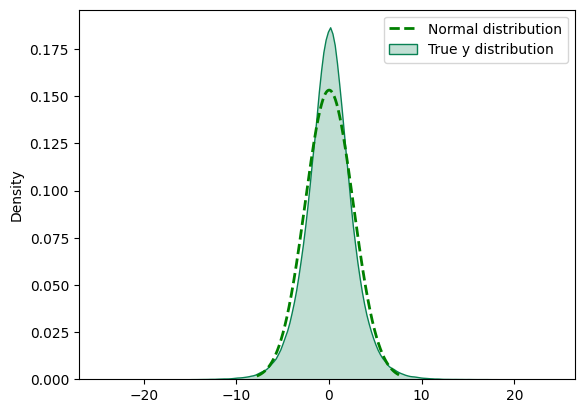

In [9]:
print("the variance of y is: ",np.var(y_data.iloc[:,0]))
print("the mean of y is: ",np.mean(y_data.iloc[:,0]))

def normpdf(x,mu,sigma):       
    pdf=np.exp(-(x-mu)**2/(2*sigma**2))/(sigma * np.sqrt(2 * np.pi))
    return pdf

mu,sigma=np.mean(y_data.iloc[:,0]), np.std(y_data.iloc[:,0])#绘制正态分布的概率密度函数
x= np.arange(mu-3*sigma,mu+3*sigma,0.01) 
y=normpdf(x,mu,sigma)#方差与平均值皆和y相同
plt.plot(x,y,'g--',linewidth=2,label="Normal distribution")

import seaborn as sns
from scipy import stats
g=sns.distplot(y_data,#绘制y的概率密度函数
               hist=False,
               kde=True,#开启核密度曲线kernel density estimate (KDE)
               kde_kws={'color':'#098154','shade':True,},
               label="True y distribution")
plt.legend("topright",labels=["Normal distribution","True y distribution"])
plt.show()

观察到y平均值接近于0，方差远大于平均值，其概率分布基本与同参数的正态分布相同，但更集中于均值附近

# 运用 t-test 检验因子和y之间是否存在线性关系

In [10]:

t_stat, p_val = ttest_ind(x_data, y_data)
#print(t_stat)
print("Biggest factor p-value is: ",max(np.abs(p_val)))
if max(np.abs(p_val))>0.1:print("Linear model is suitable for this data")
else:print("Linear model isn't suitable for this data")

Biggest factor p-value is:  0.9785753198207403
Linear model is suitable for this data


# 运用 Pearson's correlation coefficient 分析因子与y的相关性，并删去无关因子

In [11]:
from scipy.stats import pearsonr
pear=[]
for i in range(xdata.shape[1]):
    pearsonvalue,_=pearsonr(xdata.iloc[:,i], y_data)
    pear.append(float(pearsonvalue))

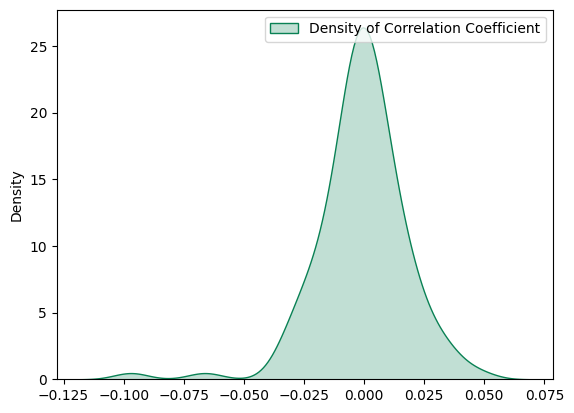

There are 10 x factors' Pearson's correlation coefficients are less than 0.001, thus deleting them. 


In [12]:
g=sns.distplot(pear,
               hist=False,
               kde=True,#开启核密度曲线kernel density estimate (KDE)
               kde_kws={'color':'#098154','shade':True,},
               label="相关系数分布图 ")
plt.legend("topright",labels=["Density of Correlation Coefficient"])
plt.show()

omitx=[]
for i in range(len(pear)):
    if np.abs(pear[i])<=0.001:
        #print(i)
        omitx.append(i)
print(f"There are {len(omitx)} x factors' Pearson's correlation coefficients are less than 0.001, thus deleting them. ")

ox_data=xdata.drop(omitx,axis=1)
ox_train=xtrain.drop(omitx,axis=1)
ox_test=xtest.drop(omitx,axis=1)


# 查看ridge模型预测效果

Ridge R2 score in train: 0.03594994495905801
Ridge R2 score in 1-th test day: 0.03851891343769176
Ridge R2 score in 2-th test day: 0.0285302618932457
Ridge R2 score in 3-th test day: 0.012235496496666554
Ridge R2 score in 4-th test day: 0.020913760179642304
Ridge R2 score in 5-th test day: 0.011541059402330744
Ridge R2 score in 6-th test day: 0.028685897035949814


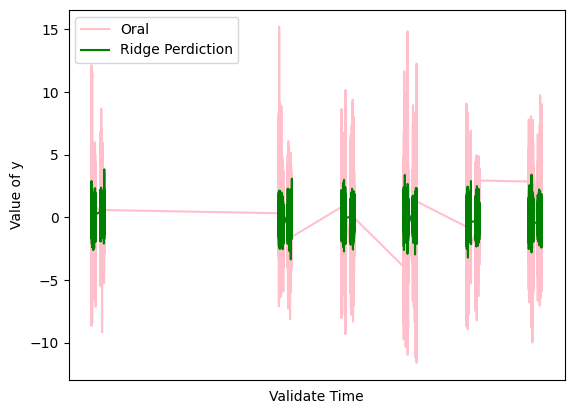

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-1, 7, 10)
ridge_model=Ridge()
# Use 10-fold cross-validation to evaluate performance for each alpha value
scores = []
for alpha in alphas:
    ridge_model.set_params(alpha=alpha)
    cv_scores = cross_val_score(ridge_model, ox_train, y_train, cv=10, scoring='neg_mean_squared_error')
    scores.append(np.mean(cv_scores))

# Find the alpha value with the best mean cross-validation score
best_alpha = alphas[np.argmax(scores)]

# Train a final model using the best alpha value
ridge_model.set_params(alpha=best_alpha)
ridge_model.fit(ox_train, y_train)

print("Ridge R2 score in train:", r2_score(y_true=y_train,y_pred=ridge_model.predict(ox_train)))
ridge_score=[r2_score(y_true=y_train,y_pred=ridge_model.predict(ox_train))]
ridge_var=[]

plt.plot(t_test,y_test,color='pink')


for i in range(len(test_file_names)):
    st=locat[i+len(train_file_names)]-locat[len(train_file_names)]
    en=locat[i+len(train_file_names)+1]-locat[len(train_file_names)]

    
    y_pred=ridge_model.predict(ox_test.iloc[st:en,:])
    plt.plot(t_test.iloc[st:en,:],y_pred,color='green')

    sco=r2_score(y_true=y_test.iloc[st:en,:],y_pred=y_pred)
    print(f"Ridge R2 score in {i+1}-th test day:",sco)
    ridge_score.append(sco)
    ridge_var.append(np.var(y_pred))

plt.xlabel('Validate Time')
plt.xticks ([])
plt.ylabel("Value of y")
plt.legend(labels=['Oral','Ridge Perdiction'])
plt.show()



# 查看lightgbm模型预测效果

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
LightGBM R2 score in train:  0.04385107539125355
lgb R2 score in 1-th test day: 0.030960131078690445
lgb R2 score in 2-th test day: 0.03850354534764899
lgb R2 score in 3-th test day: 0.010936525541996533
lgb R2 score in 4-th test day: 0.01773527422819854
lgb R2 score in 5-th test day: 0.016179028246824267
lgb R2 score in 6-th test day: 0.027107030459888937


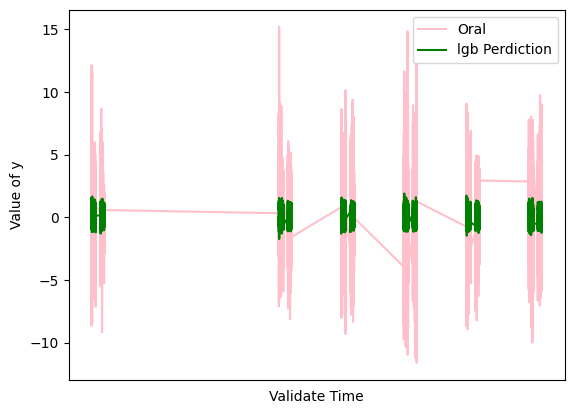

In [14]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=80,learning_rate=0.1,feature_fraction=0.6,
                                            min_child_samples=28)

# Fit the model to the training data
lgb_model.fit(ox_train, y_train)
y_pred = lgb_model.predict(ox_train)
lgb_var=[]

print("LightGBM R2 score in train: ", r2_score(y_pred=y_pred,y_true=y_train))

plt.plot(t_test,y_test,color='pink')

lgb_score=[r2_score(y_true=y_train,y_pred=y_pred)]
for i in range(len(test_file_names)):
    st=locat[i+len(train_file_names)]-locat[len(train_file_names)]
    en=locat[i+len(train_file_names)+1]-locat[len(train_file_names)]

    y_pred=lgb_model.predict(ox_test.iloc[st:en,:])
    plt.plot(t_test.iloc[st:en,:],y_pred,color='green')

    sco=r2_score(y_true=y_test.iloc[st:en,:],y_pred=y_pred)

    print(f"lgb R2 score in {i+1}-th test day:",sco)
    lgb_score.append(sco)
    lgb_var.append(np.var(y_pred))

plt.xlabel('Validate Time')
plt.xticks ([])
plt.ylabel("Value of y")
plt.legend(labels=['Oral','lgb Perdiction'])
plt.show()


# 查看随机森林预测效果

RandomForest R2 score in train:  0.03538317826536075
RandomForest R2 score in 1-th test day: 0.017730586505844137
RandomForest R2 score in 2-th test day: 0.017978103163354353
RandomForest R2 score in 3-th test day: 0.006683433629481983
RandomForest R2 score in 4-th test day: 0.008860297971485465
RandomForest R2 score in 5-th test day: 0.009820690646562436
RandomForest R2 score in 6-th test day: 0.015132388296503319


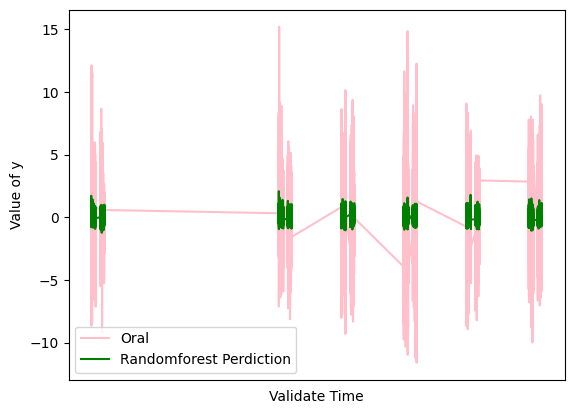

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=10,max_features='sqrt',n_estimators=80)

rf.fit(ox_train, y_train)
y_pred = rf.predict(ox_train)
print("RandomForest R2 score in train: ", r2_score(y_pred=y_pred,y_true=y_train))

plt.plot(t_test,y_test,color='pink')

rf_score=[r2_score(y_true=y_train,y_pred=y_pred)]
rf_var=[]


for i in range(len(test_file_names)):
    st=locat[i+len(train_file_names)]-locat[len(train_file_names)]
    en=locat[i+len(train_file_names)+1]-locat[len(train_file_names)]

    y_pred=rf.predict(ox_test.iloc[st:en,:])
    plt.plot(t_test.iloc[st:en,:],y_pred,color='green')

    sco=r2_score(y_true=y_test.iloc[st:en,:],y_pred=y_pred)

    print(f"RandomForest R2 score in {i+1}-th test day:",sco)
    rf_score.append(sco)
    rf_var.append(np.var(y_pred))

plt.xlabel('Validate Time')
plt.xticks ([])
plt.ylabel("Value of y")
plt.legend(labels=['Oral','Randomforest Perdiction'])
plt.show()


# 取线性模型中效果较好的ridge与非线性模型中效果较好的lightgbm进行复合，查看预测效果

lgb&ridge R2 score in training: 0.04198490139858335
lgb&ridge R2 score in 1-th test day: 0.04088532292582836
lgb&ridge R2 score in 2-th test day: 0.040671252267958535
lgb&ridge R2 score in 3-th test day: 0.0165163203027211
lgb&ridge R2 score in 4-th test day: 0.02208252574454128
lgb&ridge R2 score in 5-th test day: 0.01952034246825185
lgb&ridge R2 score in 6-th test day: 0.03289607592993349


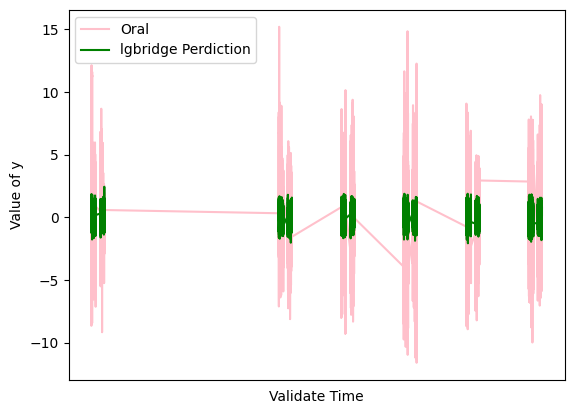

In [44]:
y_pred1=0.5*lgb_model.predict(ox_train)
y_pred2=0.5*ridge_model.predict(ox_train)[:,0]
print("lgb&ridge R2 score in training:",r2_score(y_true=y_train,y_pred=y_pred2+y_pred1))

lgbridge_score=[r2_score(y_true=y_train,y_pred=y_pred2+y_pred1)]
plt.plot(t_test,y_test,color='pink')
lgbridge_var=[]

for i in range(len(test_file_names)):
    st=locat[i+len(train_file_names)]-locat[len(train_file_names)]
    en=locat[i+len(train_file_names)+1]-locat[len(train_file_names)]


    y_pred1=0.5*lgb_model.predict(ox_test.iloc[st:en,:])
    y_pred2=0.5*ridge_model.predict(ox_test.iloc[st:en,:])[:,0]

    plt.plot(t_test.iloc[st:en,:],y_pred1+y_pred2,color='green')
    sco=r2_score(y_true=y_test.iloc[st:en,:],y_pred=y_pred1+y_pred2)

    print(f"lgb&ridge R2 score in {i+1}-th test day:",sco)
    lgbridge_score.append(sco)
    lgbridge_var.append(np.var(y_pred))

plt.xlabel('Validate Time')
plt.xticks ([])
plt.ylabel("Value of y")
plt.legend(labels=['Oral','lgbridge Perdiction'])
plt.show()

比较各模型r2score可知，复合模型相较原来两模型预测准确率有一定提升。<p>
比较各模型的预测曲线，可观察到复合模型预测值的方差小于ridge，大于lgboost，适当改进了线性模型方差较大，非线性模型过于集中的缺点<P>
因此多模型复合有实际意义

# 查看online learning算法预测效果

online model R2 score in training: -0.20148091531238554
online model R2 score in 1-th test day: -0.2791477947108352
online model R2 score in 2-th test day: -0.3472056234169203
online model R2 score in 3-th test day: -0.19941019613046418
online model R2 score in 4-th test day: -0.1530711634817914
online model R2 score in 5-th test day: -0.19424185683065542
online model R2 score in 6-th test day: -0.20717594727997213


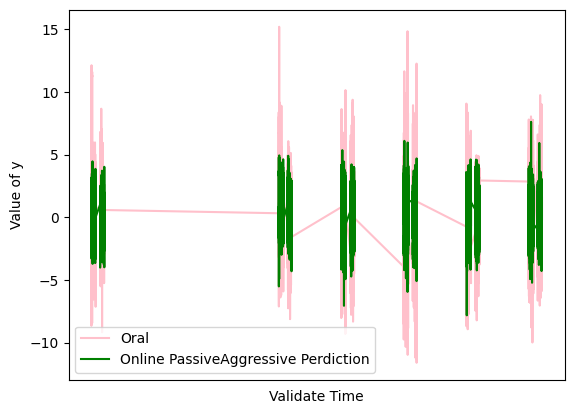

In [45]:
from sklearn.linear_model import PassiveAggressiveRegressor
import numpy as np

#for 
# create an instance of the SGDClassifier
onlinesgd_model = PassiveAggressiveRegressor(epsilon=0.001,C=0.001)

for i in range(len(train_file_names)):
    st=locat[i]
    en=locat[i+1]
# train the classifier on the first 50 samples
    onlinesgd_model.partial_fit(x_train.iloc[st:en,:], y_train.iloc[st:en,:])

plt.plot(t_test,y_test,color='pink')

y_pred=onlinesgd_model.predict(x_train)
sco=r2_score(y_true=y_train,y_pred=y_pred)
print(f"online model R2 score in training:",sco)

online_score=[sco]
online_var=[]
for i in range(len(test_file_names)):
    st=locat[i+len(train_file_names)]-locat[len(train_file_names)]
    en=locat[i+len(train_file_names)+1]-locat[len(train_file_names)]

    y_pred=onlinesgd_model.predict(x_test.iloc[st:en,:])
    sco=r2_score(y_true=y_test.iloc[st:en,:],y_pred=y_pred)
    print(f"online model R2 score in {i+1}-th test day:",sco)
    plt.plot(t_test.iloc[st:en,:],y_pred,color='green')

    online_score.append(sco)
    online_var.append(np.var(y_pred))
plt.xlabel('Validate Time')
plt.xticks ([])
plt.ylabel("Value of y")
plt.legend(labels=['Oral','Online PassiveAggressive Perdiction'])
plt.show()


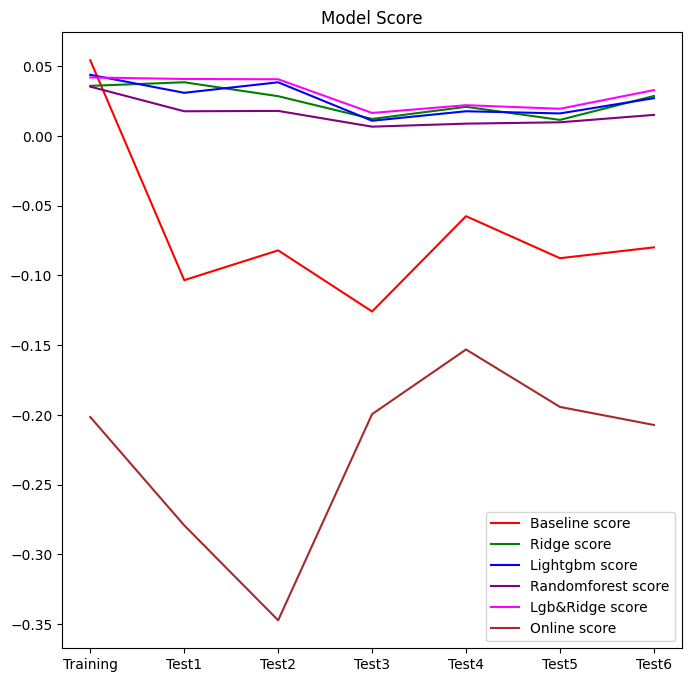

In [46]:
colo = ['red','green',
      'blue','purple','pink','magenta','brown','cyan']
plt.figure(figsize=(8,8))
plt.title("Model Score")

plt.plot(baseline_score,label='Baseline score',color=colo[0])
plt.plot(ridge_score,label='Ridge score',color=colo[1])
plt.plot(lgb_score,label='Lightgbm score',color=colo[2])
plt.plot(rf_score,label='Randomforest score',color=colo[3])
plt.plot(lgbridge_score,label='Lgb&Ridge score',color=colo[5])
plt.plot(online_score,label='Online score',color=colo[6])


plt.legend()

x_labels = ['Training','Test1','Test2','Test3','Test4','Test5','Test6']
plt.xticks(range(len(x_labels)), x_labels)

plt.show()

就预测准确率而言，online算法性能最差，LGB与Ridge的复合模型性能最好，除online算法外的其他四种算法均较baseline模型有显著提高

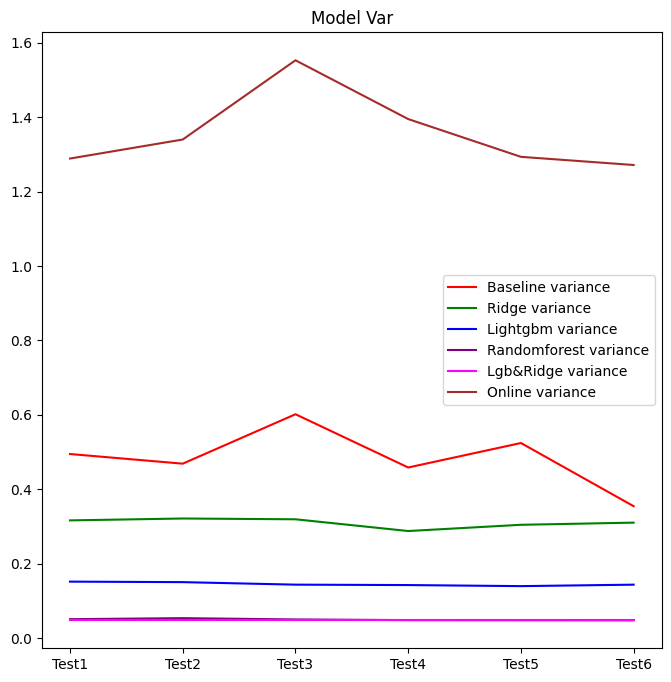

In [47]:
plt.figure(figsize=(8, 8))
plt.title("Model Var")

plt.plot(baseline_var,label='Baseline variance',color=colo[0])
plt.plot(ridge_var,label='Ridge variance',color=colo[1])
plt.plot(lgb_var,label='Lightgbm variance',color=colo[2])
plt.plot(rf_var,label='Randomforest variance',color=colo[3])
plt.plot(lgbridge_var,label='Lgb&Ridge variance',color=colo[5])
plt.plot(online_var,label='Online variance',color=colo[6])


plt.legend()

x_labels = ['Test1','Test2','Test3','Test4','Test5','Test6']
plt.xticks(range(len(x_labels)), x_labels)

plt.show()

就预测方差而言，各模型方差均较小，其中online算法最不稳定，LGB与Ridge的复合模型、Randomforest模型最稳定（其方差接近于0）。

# 总结<p>
1. 数据规模较大，因子较多，无缺失值，有一部分因子值过大或过小<p>
2. 运用PCA进行分析，发现不少因子包含的信息重复，可将150个因子降维至120个因子<p>
3. 计算y的方差与平均值，绘制其概率密度函数。发现图像与相同参数的正态分布的图像较为相似，同样具有对称性。较正态分布而言，y的值更接近与其平均值<p>
4. 运用Pearson相关系数分析y与各因子之间的关系，发现大部分因子值相关系数绝对值都小于0.01，为提高模型准确度，删去10个相关系数绝对值小于0.001的因子<p>
5. 由于因子数远小于数据量，且各模型都存在一定的的过拟合问题，因此采用线性模型采用ridge而非OLS或lasso，交叉验证后得出较优参数，模型<p>
6. 使用非线性的lightgbm与随机森林进行预测，发现lightgbm性能较优<p>
7. 尝试过使用SVM于XGboost进行预测，但未调参前存在严重的过拟合问题，且单次训练时间长，网格调参时间过久，因此并未使用<p>
8. 训练时间：Ridge<lgbm<randomforest
9. 尝试将非线性模型中表现较好的lgb和线性模型中表现较好的ridge进行混合，发现混合后的模型精准度较原来两模型有显著提升
10. 尝试使用在线算法进行预测，但精确度与方差均不如上述模型
11. 总体来说，使用ridge与lgbm进行复合的模型性能较好
12. 模型在样本外每天的表现差异：方差较为平均，但前两天的准确度显著高于后四天。原因：y值在前两天更符合原来train集的数据规律，但后四天由于时间间隔与训练集较久，y值与因子的关系发生了一定变化，因此准确度降低
